# Comparing edge-based and region-based segmentation

**Tratamiento de Señales III**

*Prof. Hernán Felipe García Arias*

*Facultad de Ingeniería*

*Universidad de Antioquia*


In this example, we will see how to segment objects from a background. We use
the ``coins`` image from ``skimage.data``, which shows several coins outlined
against a darker background.


Text(0.5, 1.0, 'histogram of gray values')

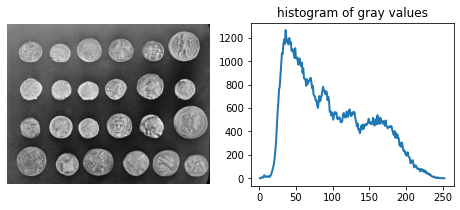

In [14]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage.exposure import histogram

coins = data.coins()
hist, hist_centers = histogram(coins)

fig, axes = plt.subplots(1, 2, figsize=(8, 3))
axes[0].imshow(coins, cmap=plt.cm.gray)
axes[0].axis('off')
axes[1].plot(hist_centers, hist, lw=2)
axes[1].set_title('histogram of gray values')

## Thresholding

A simple way to segment the coins is to choose a threshold based on the
histogram of gray values. Unfortunately, thresholding this image gives a
binary image that either misses significant parts of the coins or merges
parts of the background with the coins:



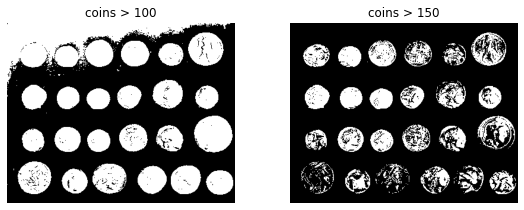

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3), sharey=True)

axes[0].imshow(coins > 100, cmap=plt.cm.gray)
axes[0].set_title('coins > 100')

axes[1].imshow(coins > 150, cmap=plt.cm.gray)
axes[1].set_title('coins > 150')

for a in axes:
    a.axis('off')

plt.tight_layout()

## Edge-based segmentation

Next, we try to delineate the contours of the coins using edge-based
segmentation. To do this, we first get the edges of features using the
Canny edge-detector.



(-0.5, 383.5, 302.5, -0.5)

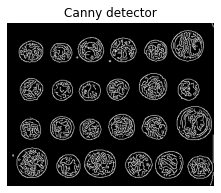

In [16]:
from skimage.feature import canny

edges = canny(coins)

fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(edges, cmap=plt.cm.gray)
ax.set_title('Canny detector')
ax.axis('off')

These contours are then filled using mathematical morphology.



(-0.5, 383.5, 302.5, -0.5)

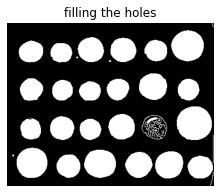

In [17]:
from scipy import ndimage as ndi

fill_coins = ndi.binary_fill_holes(edges)

fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(fill_coins, cmap=plt.cm.gray)
ax.set_title('filling the holes')
ax.axis('off')

Small spurious objects are easily removed by setting a minimum size for
valid objects.



(-0.5, 383.5, 302.5, -0.5)

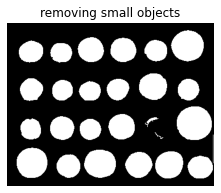

In [18]:
from skimage import morphology

coins_cleaned = morphology.remove_small_objects(fill_coins, 21)

fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(coins_cleaned, cmap=plt.cm.gray)
ax.set_title('removing small objects')
ax.axis('off')

However, this method is not very robust, since contours that are not
perfectly closed are not filled correctly, as is the case for one unfilled
coin above.

## Region-based segmentation

We therefore try a region-based method using the watershed transform.
First, we find an elevation map using the Sobel gradient of the image.



(-0.5, 383.5, 302.5, -0.5)

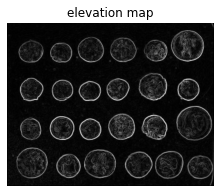

In [19]:
from skimage.filters import sobel

elevation_map = sobel(coins)

fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(elevation_map, cmap=plt.cm.gray)
ax.set_title('elevation map')
ax.axis('off')

Next we find markers of the background and the coins based on the extreme
parts of the histogram of gray values.



(-0.5, 383.5, 302.5, -0.5)

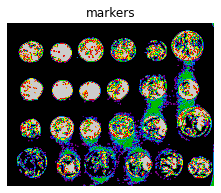

In [20]:
markers = np.zeros_like(coins)
markers[coins < 30] = 1
markers[coins > 150] = 2

fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(markers, cmap=plt.cm.nipy_spectral)
ax.set_title('markers')
ax.axis('off')

Finally, we use the watershed transform to fill regions of the elevation
map starting from the markers determined above:



(-0.5, 383.5, 302.5, -0.5)

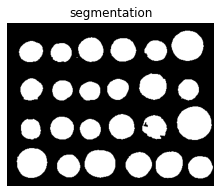

In [21]:
from skimage import segmentation

segmentation_coins = segmentation.watershed(elevation_map, markers)

fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(segmentation_coins, cmap=plt.cm.gray)
ax.set_title('segmentation')
ax.axis('off')

This last method works even better, and the coins can be segmented and
labeled individually.



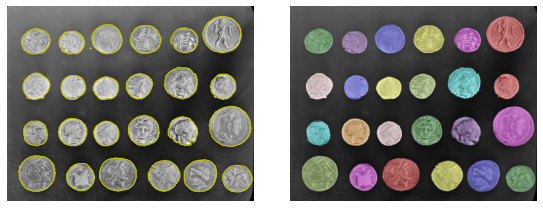

In [22]:
from skimage.color import label2rgb

segmentation_coins = ndi.binary_fill_holes(segmentation_coins - 1)
labeled_coins, _ = ndi.label(segmentation_coins)
image_label_overlay = label2rgb(labeled_coins, image=coins, bg_label=0)

fig, axes = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
axes[0].imshow(coins, cmap=plt.cm.gray)
axes[0].contour(segmentation_coins, [0.5], linewidths=1.2, colors='y')
axes[1].imshow(image_label_overlay)

for a in axes:
    a.axis('off')

plt.tight_layout()

plt.show()

In [24]:
import numpy as np

print(np.unique(labeled_coins))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]


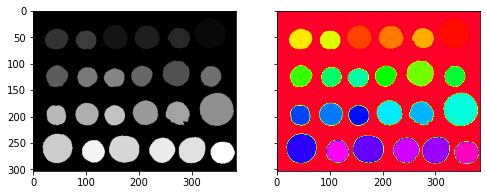

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
axes[0].imshow(labeled_coins, cmap=plt.cm.gray)
axes[1].imshow(labeled_coins, cmap=plt.cm.gist_rainbow)


### Creating listed colormaps

Any numpy operations that we can do on a Nx4 array make carpentry of new colormaps from existing colormaps quite straight forward.

Suppose we want to make the first 25 entries of a 256-length "viridis" colormap pink for coloring our coins_

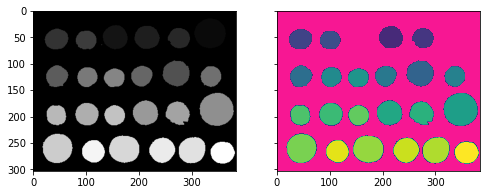

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

viridis = cm.get_cmap('viridis', 256)
newcolors = viridis(np.linspace(0, 1, 256))
pink = np.array([248/256, 24/256, 148/256, 1])
newcolors[:25, :] = pink
newcmp = ListedColormap(newcolors)

fig, axes = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
axes[0].imshow(labeled_coins, cmap=plt.cm.gray)
axes[1].imshow(labeled_coins, cmap=newcmp)


## Creating Random Colormaps

Fir we create a random matrix of $N_{colors}\times 4$ with the last column in ones (i.e., required for matplotlib)

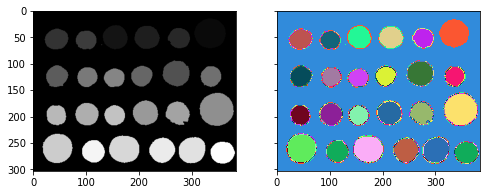

In [47]:
randomColors = np.random.rand(25,4)
randomColors[:,3] = 1.
newcmpRND = ListedColormap(randomColors)

fig, axes = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
axes[0].imshow(labeled_coins, cmap=plt.cm.gray)
axes[1].imshow(labeled_coins, cmap=newcmpRND)
